<a href="https://colab.research.google.com/github/Bibekpdl1/Exploratory-Data-Analysis-using-Python/blob/main/eda_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading the train data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_data = pd.read_csv('/content/drive/My Drive/Personal Projects/Exploratory Data Analysis using Python/Datasets/train.csv')
train = training_data.copy()
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Removing unncessary features(PassengerId and Name)

In [4]:
# dropping unimportant features (PassengerId and Name)
train.drop(columns=['PassengerId','Name'], axis=1, inplace=True)

Findings the basics info about the data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


Splitting the data into two parts: one for independent features and other for dependent features

In [6]:
# splitting data into independent dependent and features
X = train.drop(['Transported'],axis=1)
Y = train['Transported']

Getting the names of numerical and categorical features in the data

In [7]:
num_feat = [feature for feature in X.columns if X[feature].dtypes != 'O']
cat_feat = [feature for feature in X.columns if feature not in num_feat]

print(f"The numerical features in the data are {num_feat}.\n")
print(f"The categorical features in the data are {cat_feat}.")

The numerical features in the data are ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'].

The categorical features in the data are ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'].


Transforming the 'Cabin' feature into three different features and then removing the original 'Cabin' feature

In [8]:
#removing '/' from the Cabin feature values
X['Cabin'] = X['Cabin'].str.replace('/','')

#creating three new features by splitting the original Cabin feature
X['Cabin_deck'] = X['Cabin'].str[0]
X['Cabin_num'] = X['Cabin'].str[1].apply(pd.to_numeric)
X['Cabin_side'] = X['Cabin'].str[2]

#removing the original Cabin feature
X.drop(['Cabin'], axis=1, inplace=True)

Checking the names of new numerical and categorical features after Cabin feature transformation

In [9]:
# getting the names of numerical and categorical features again
num_feat = [feature for feature in X.columns if X[feature].dtypes != 'O']
cat_feat = [feature for feature in X.columns if feature not in num_feat]

print(f"The numerical features in the data are {num_feat}.\n")
print(f"The categorical features in the data are {cat_feat}.")

The numerical features in the data are ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num'].

The categorical features in the data are ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side'].


Checking if there are any features with zero variance (numerical features)

this wont give any output i.e, data don't have any numerical features

In [10]:
for feature in num_feat:
  if X[feature].var() == 0:
    print(feature)

In [11]:
#finding out if any features have zero variance in categorical feature
for features in cat_feat:
  if X[feature].nunique() == 1:
    print(feature)

Checking out unique values in the categorical features

In [12]:
for feature in cat_feat:
  print(f"The unique values in the {feature} are {X[feature].unique()} (total of {X[feature].nunique()}).\n")

The unique values in the HomePlanet are ['Europa' 'Earth' 'Mars' nan] (total of 3).

The unique values in the CryoSleep are [False True nan] (total of 2).

The unique values in the Destination are ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] (total of 3).

The unique values in the VIP are [False True nan] (total of 2).

The unique values in the Cabin_deck are ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] (total of 8).

The unique values in the Cabin_side are ['P' 'S' nan '0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] (total of 12).



Checking the correlation between numerical independent features and the dependent features

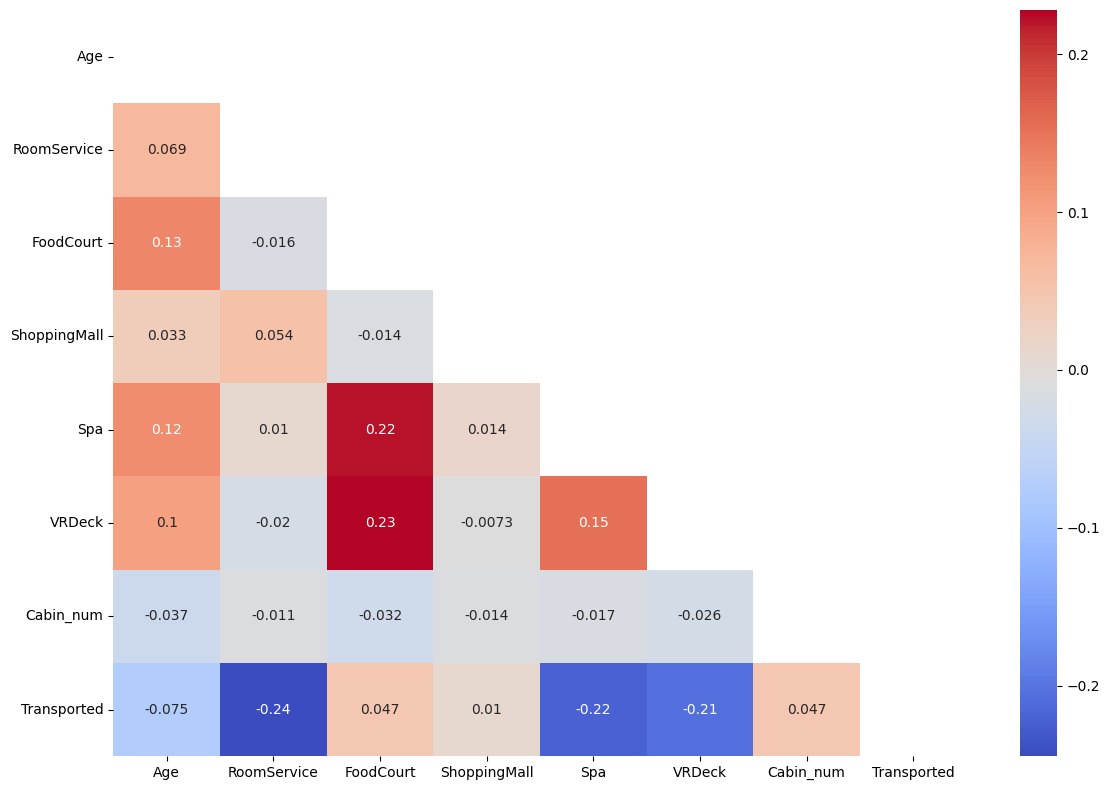

In [13]:
from sklearn.preprocessing import OrdinalEncoder

df1 = pd.DataFrame(X[num_feat], columns=num_feat) #dataframe having numerical feature
df2 = pd.DataFrame(Y, columns=['Transported']) #dataframe having dependent feature
df_num = pd.concat([df1,df2], axis=1) #dataframe having aa numerical features and one dependent feature

plt.figure(figsize=(12,8))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.tight_layout()

Correlation between categorical independent feature and dependent feature

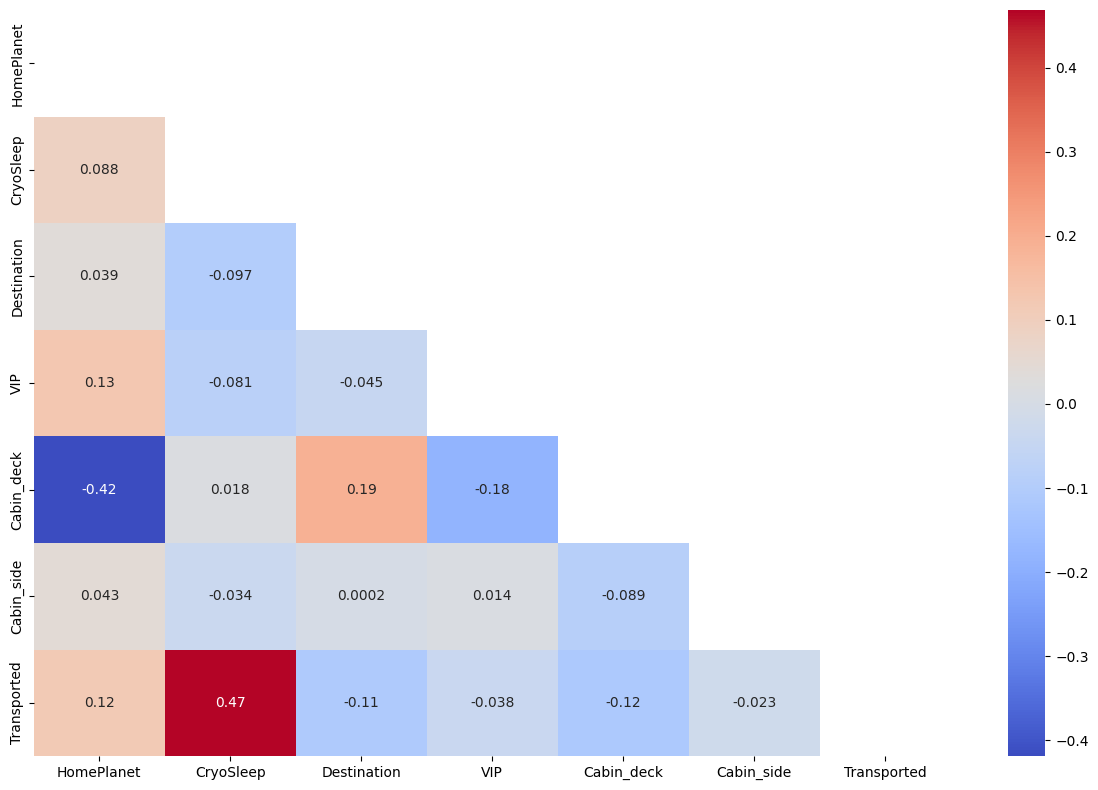

In [18]:
   from sklearn.preprocessing import OrdinalEncoder

df1 = pd.DataFrame(OrdinalEncoder().fit_transform(X[cat_feat]), columns=cat_feat) #dataframe having encoded categorical feature
df2 = pd.DataFrame(Y, columns=['Transported']) #dataframe having dependent feature
df_cat = pd.concat([df1,df2], axis=1) #dataframe having all encoded categorical features and one dependent feature

plt.figure(figsize=(12,8))
corr = df_cat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)
plt.tight_layout()

Checking out the presence of missing values in our data

In [19]:
#checking the number of missing values in each of the features
missing_values_df = pd.DataFrame()
missing_values_df['Features'] = X.columns
missing_values_df['Number_of_missing_values'] = X.isnull().sum().to_numpy()
missing_values_df['Percentage_of_missing_values (%)'] = missing_values_df['Number_of_missing_values'].apply(lambda x: np.round((x/X.shape[0])*100),2)
missing_values_df

,Features,Number_of_missing_values,Percentage_of_missing_values (%)
0,HomePlanet,201,2.0
1,CryoSleep,217,2.0
2,Destination,182,2.0
3,Age,179,2.0
4,VIP,203,2.0
5,RoomService,181,2.0
6,FoodCourt,183,2.0
7,ShoppingMall,208,2.0
8,Spa,183,2.0
9,VRDeck,188,2.0


Let's visualize the missing values for fun

<Axes: >

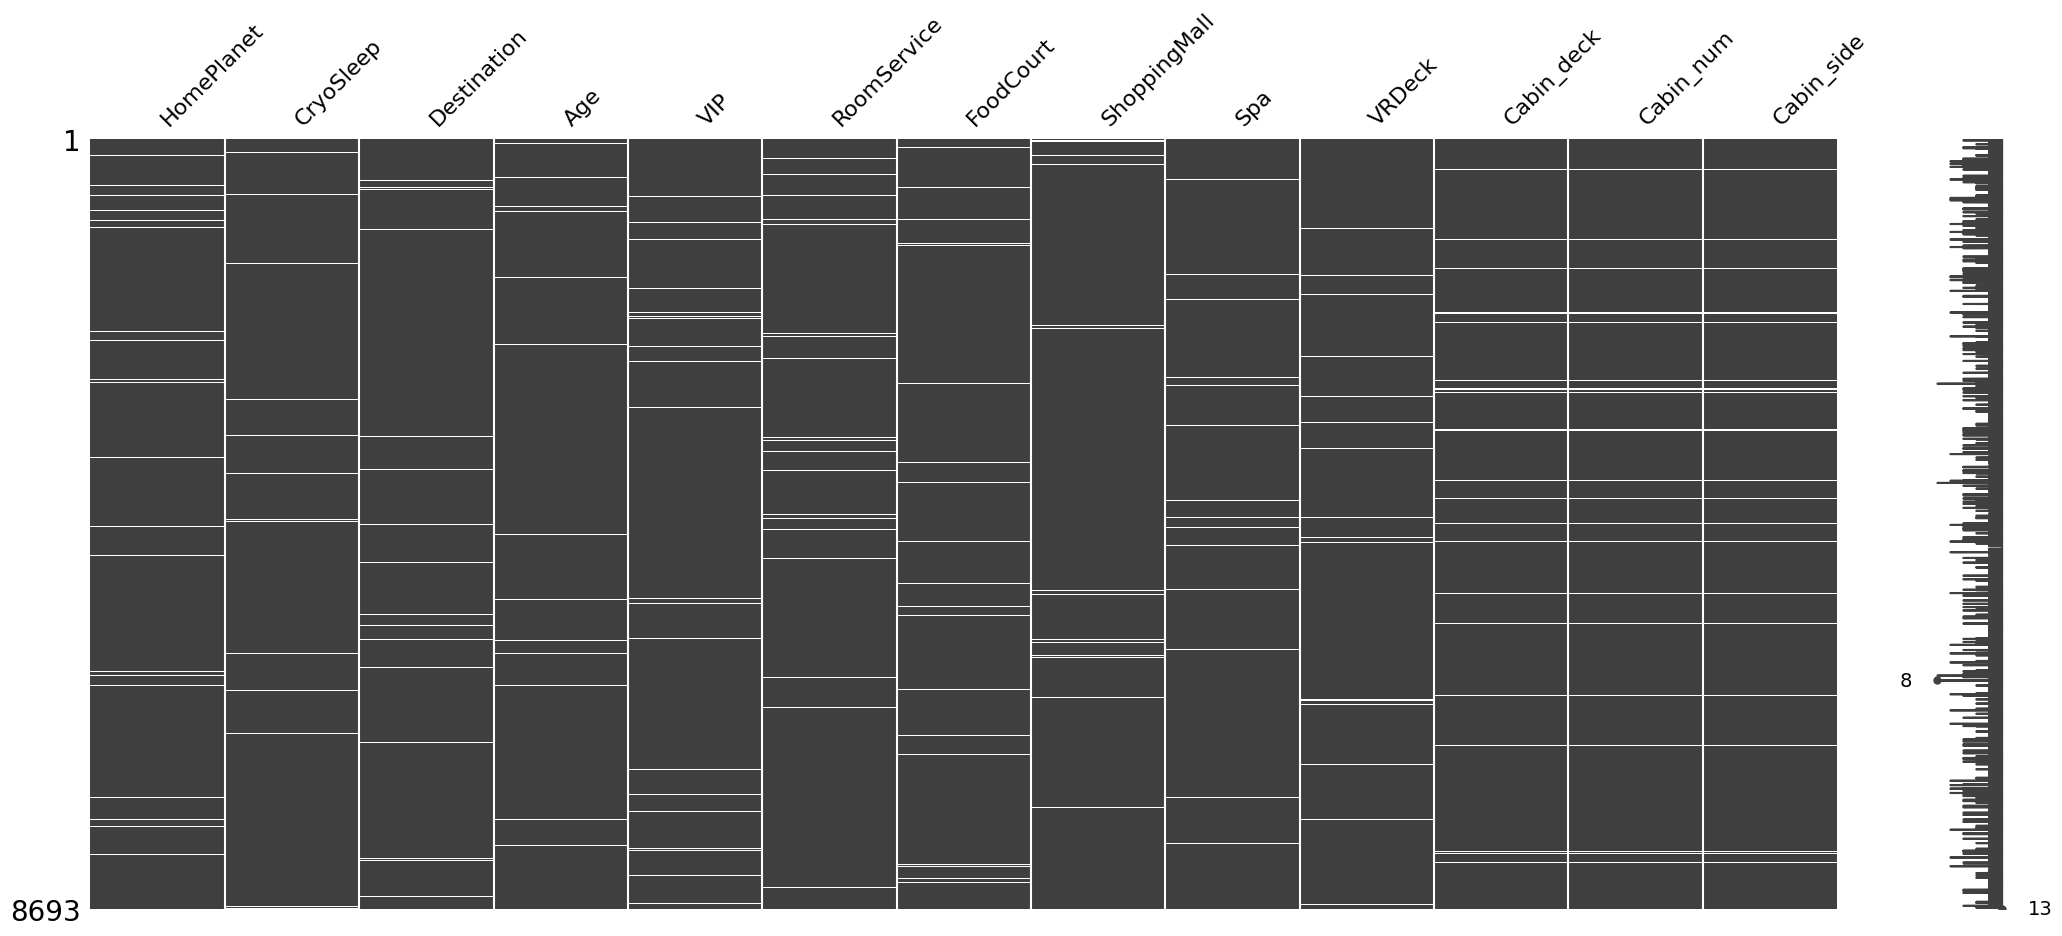

In [20]:
import missingno as msgn
msgn.matrix(X)

Checking the presence of outliers in the data using the distributed plots and boxplots

1. Using Distributed plots

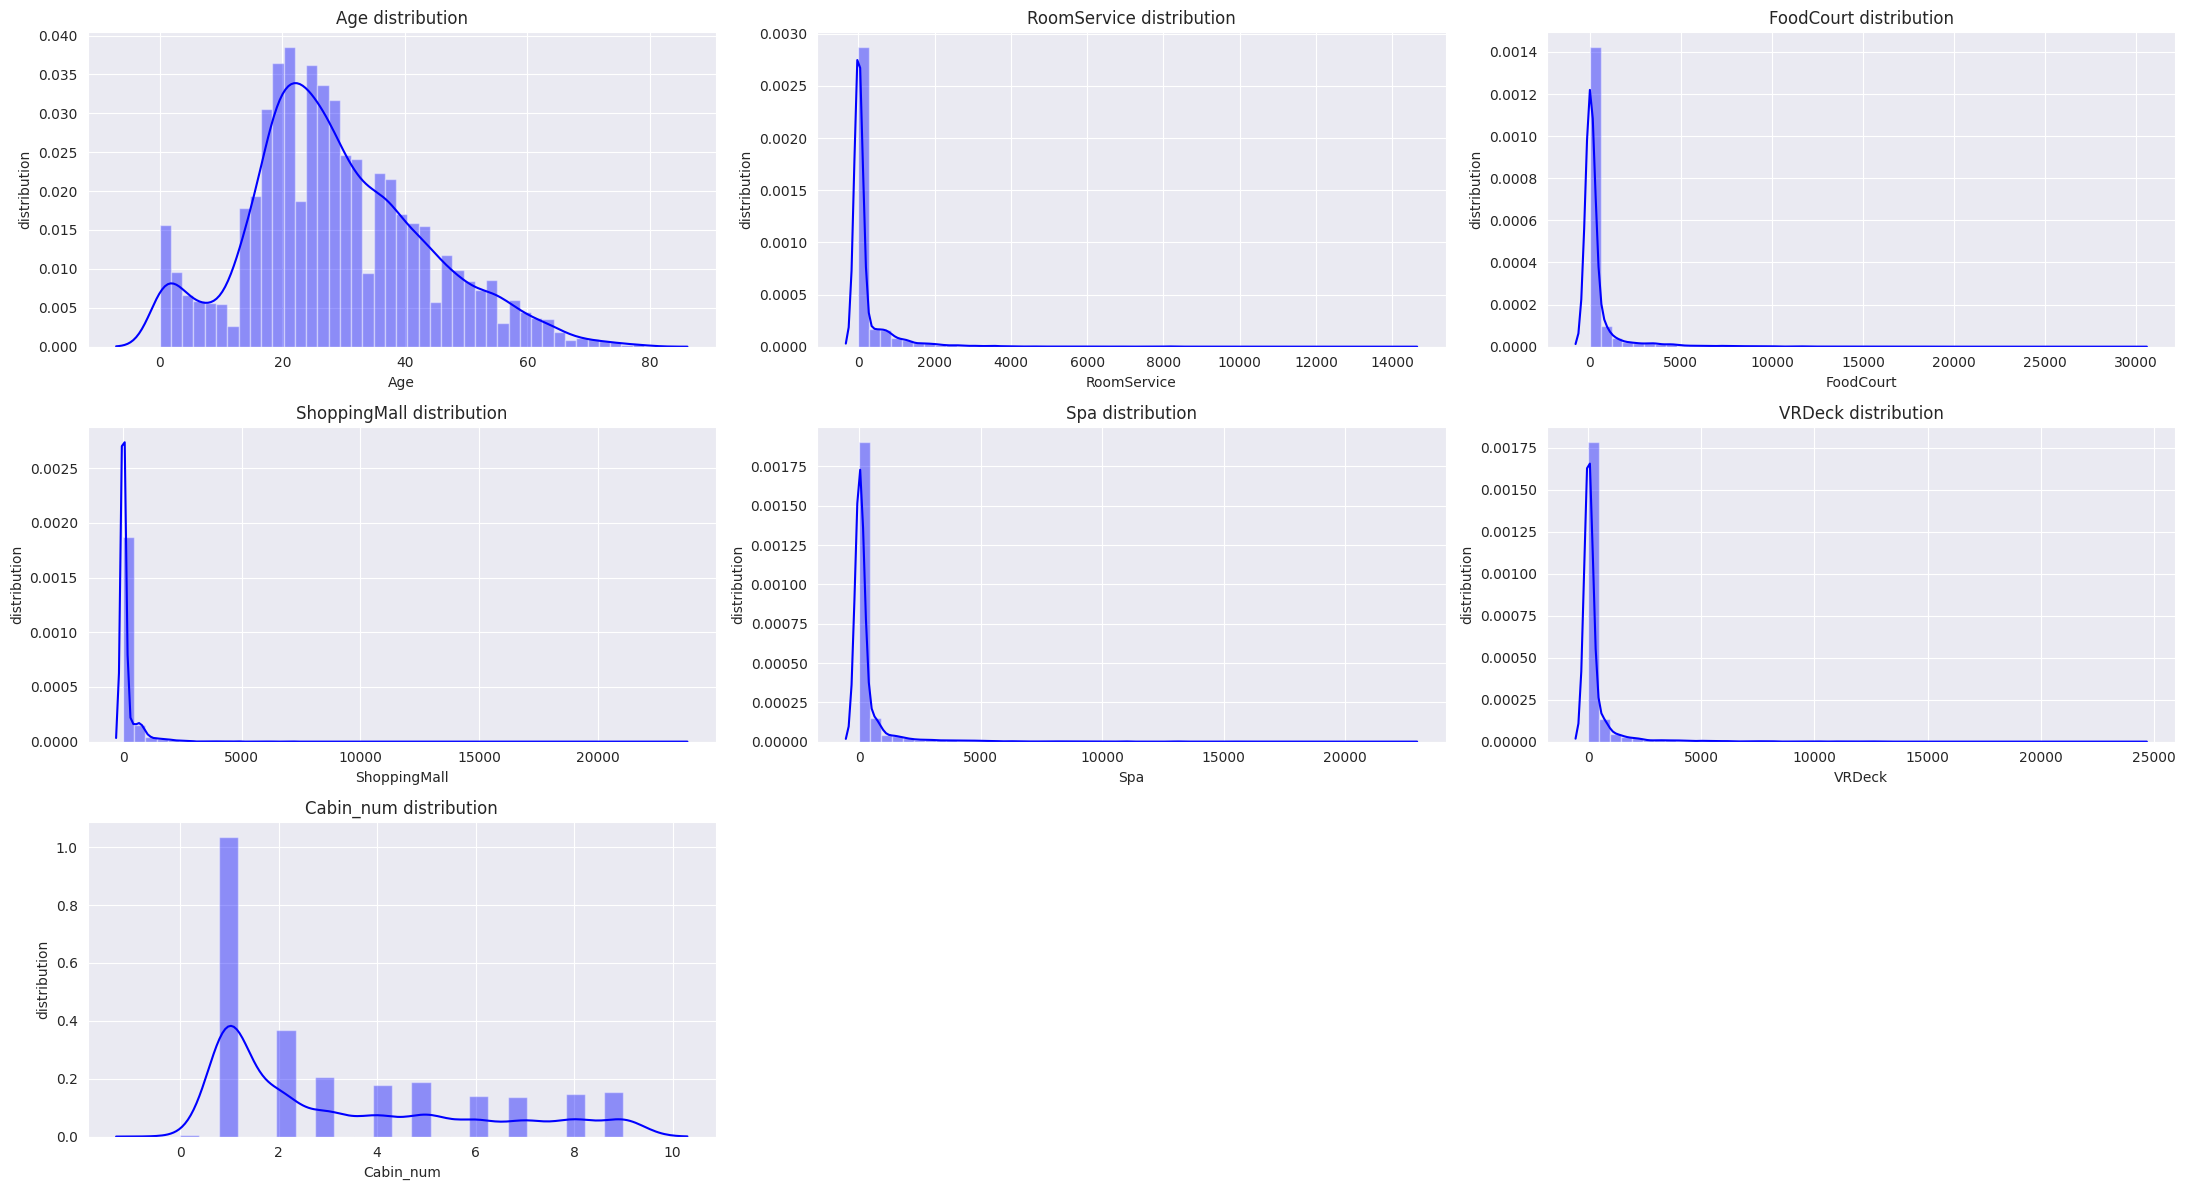

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,12))
for index, feature in enumerate(num_feat):
  plt.subplot(3,3,index+1)
  sns.distplot(X[feature],kde=True, color='b')
  plt.xlabel(feature)
  plt.ylabel('distribution')
  plt.title(f"{feature} distribution")

plt.tight_layout()

2. Using boxplots

<Axes: >

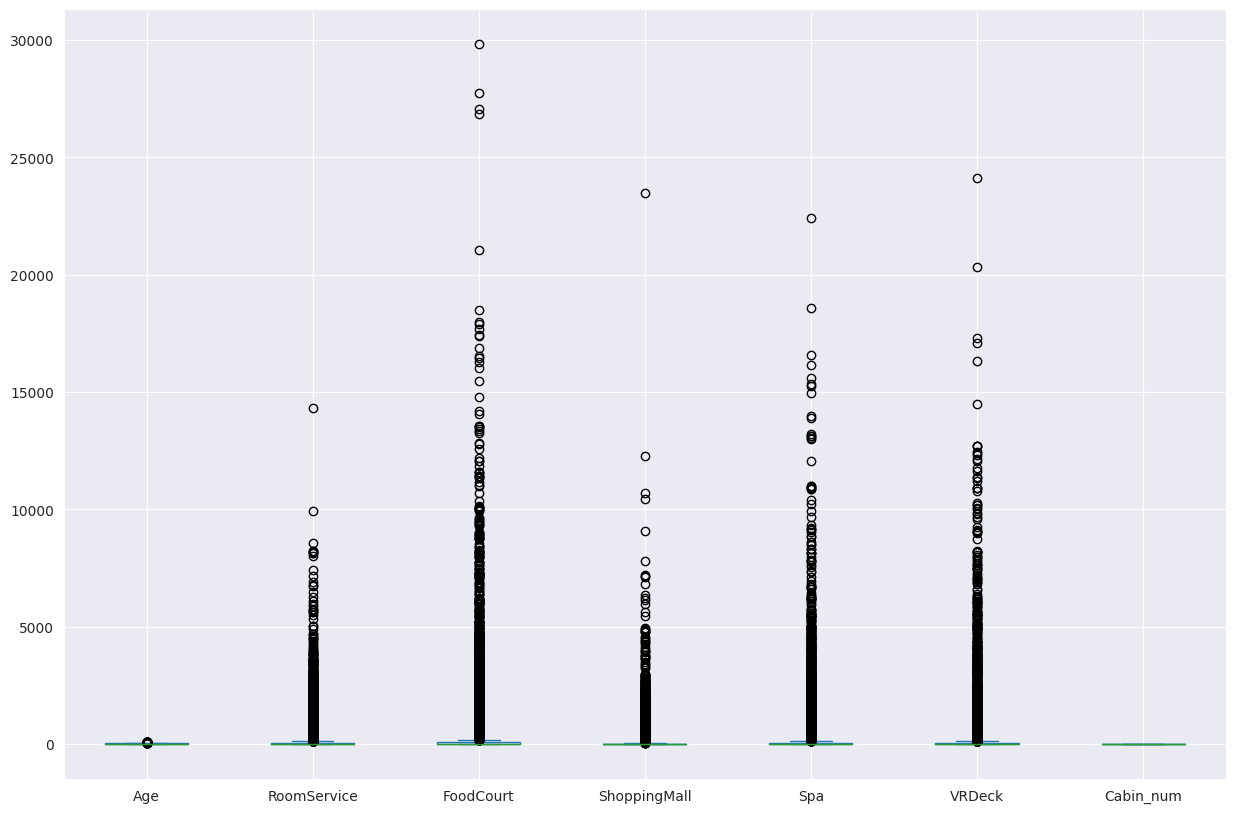

In [22]:
X[num_feat].plot(kind='box',figsize=(15,10))

Checking the multi-collinearity between the independent feature using pairplot and using VIF value

!. Using pairplot

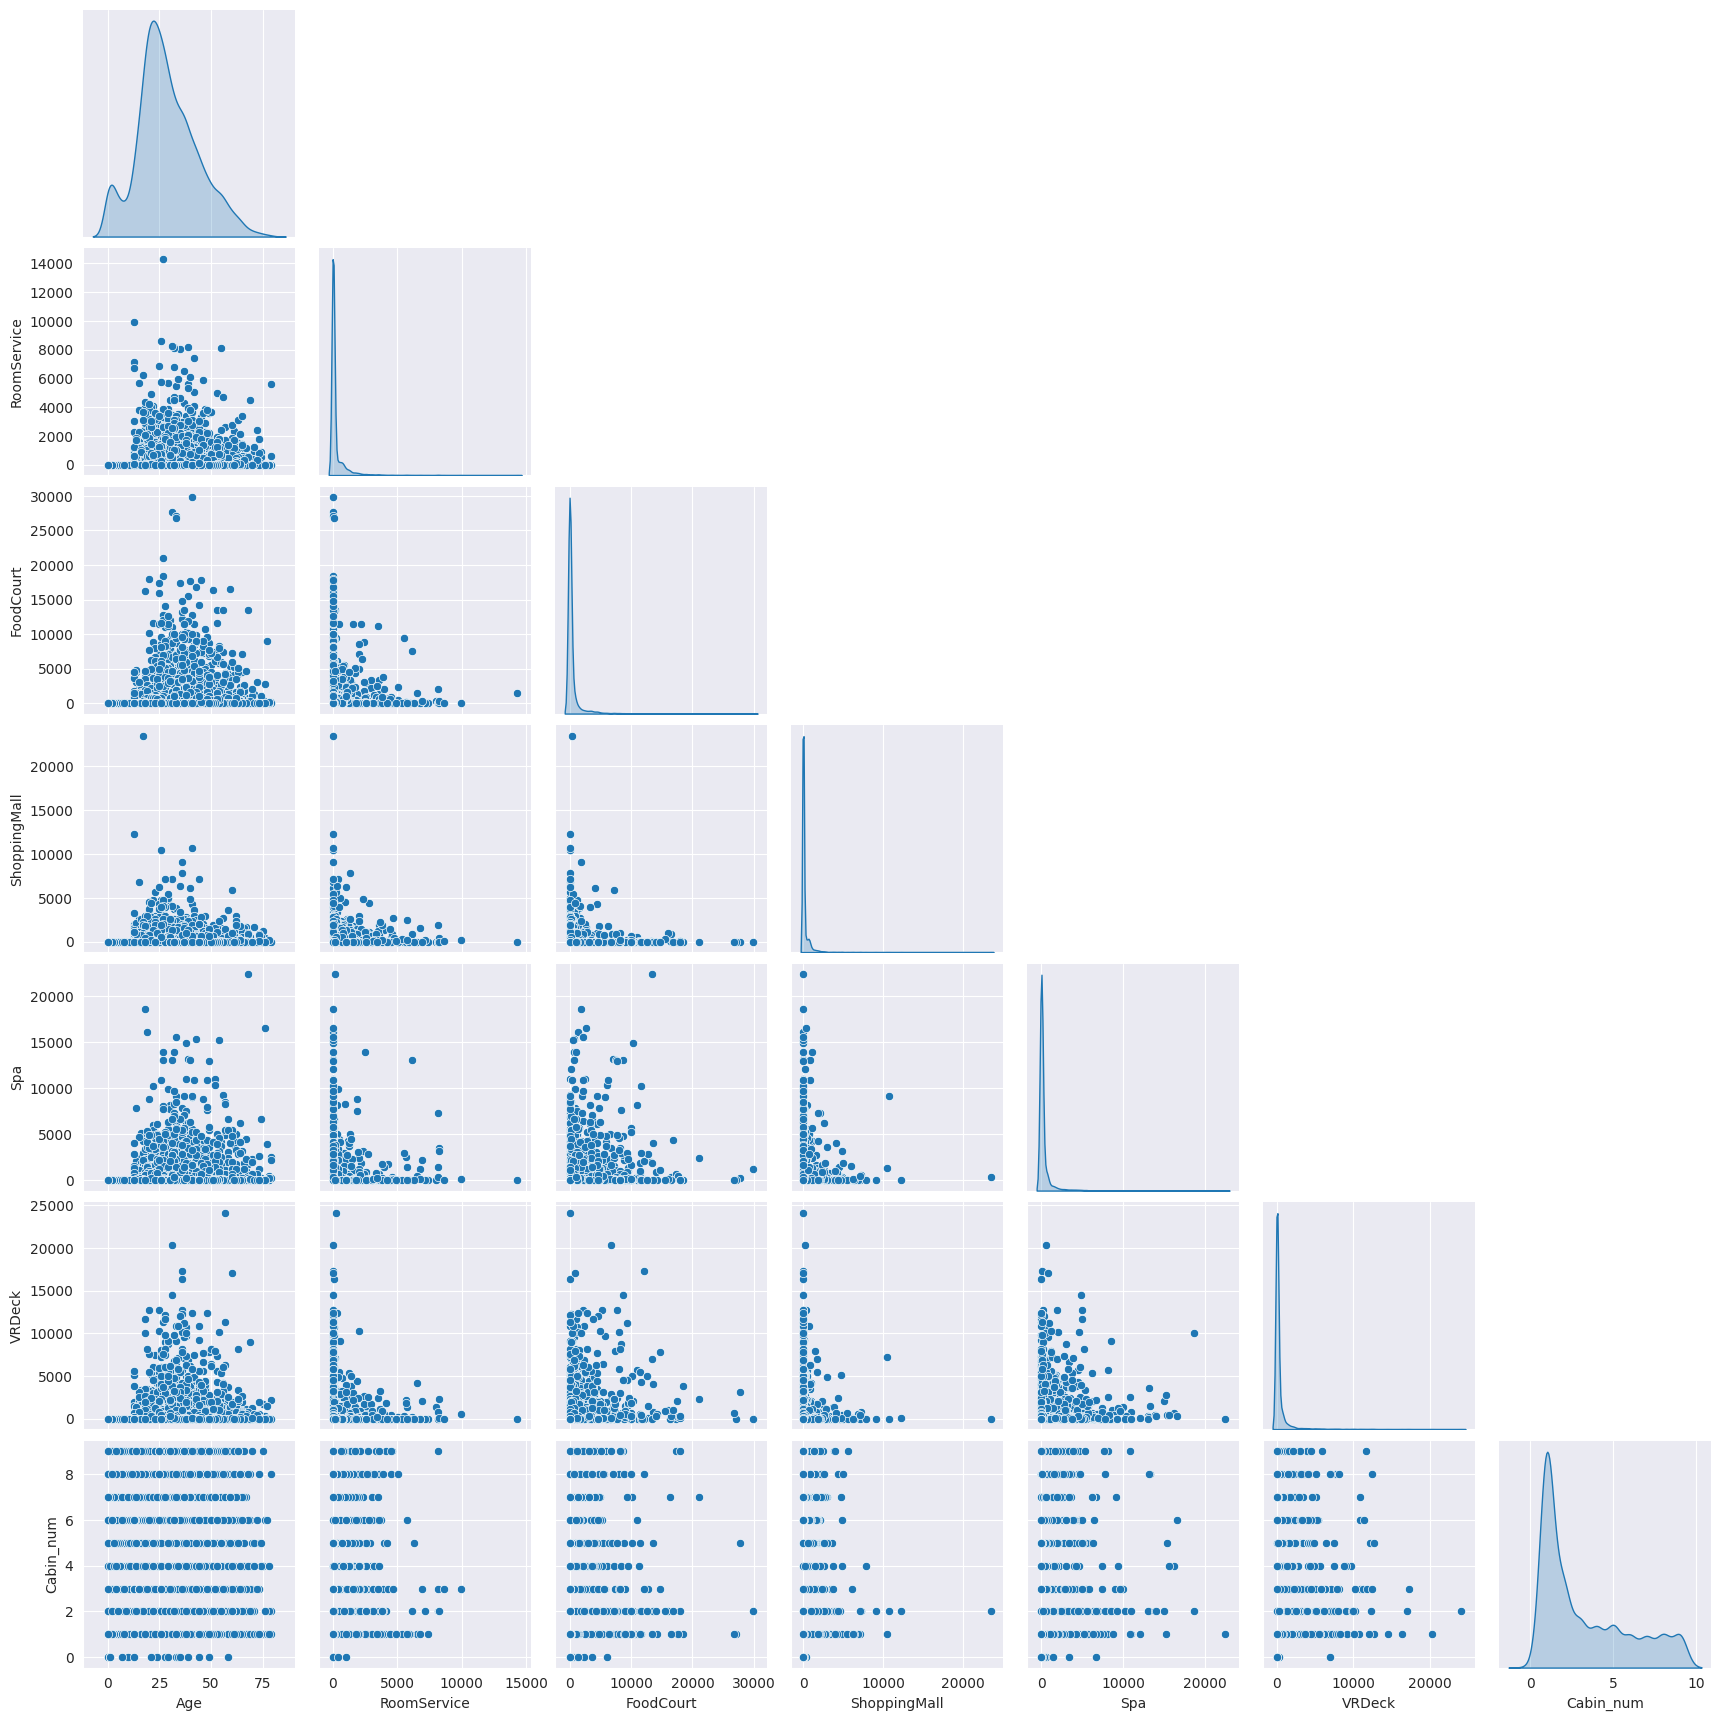

In [23]:
sns.pairplot(X[num_feat], corner=True, diag_kind='kde')

Using VIF value

In [26]:
#finding multi-collinearity in the numerical independent features
# we use the following rules of thumb for interpreting VIF values

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['Variable'] = num_feat

#calculatee VIF for each predictor variable
#we will fill in missing values in the data with mean of the data before feeding it to the function
num_df = pd.DataFrame(SimpleImputer(strategy = 'mean').fit_transform(X[num_feat]), columns=num_feat)
vif_df['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]

def mc_check(x):
  if x == 1:
    return 'Low'
  elif (x>1 and x<5):
    return 'Moderate'
  elif (x>=5):
    return 'Severe'

vif_df['Multi-Collinearity Presence'] = vif_df['VIF'].apply(mc_check)

#view VIF for each predictor variable
print(vif_df)

       Variable       VIF Multi-Collinearity Presence
0           Age  2.260704                    Moderate
1   RoomService  1.118332                    Moderate
2     FoodCourt  1.195441                    Moderate
3  ShoppingMall  1.080783                    Moderate
4           Spa  1.153295                    Moderate
5        VRDeck  1.145640                    Moderate
6     Cabin_num  1.914770                    Moderate


Checking out the distribution of categorical features

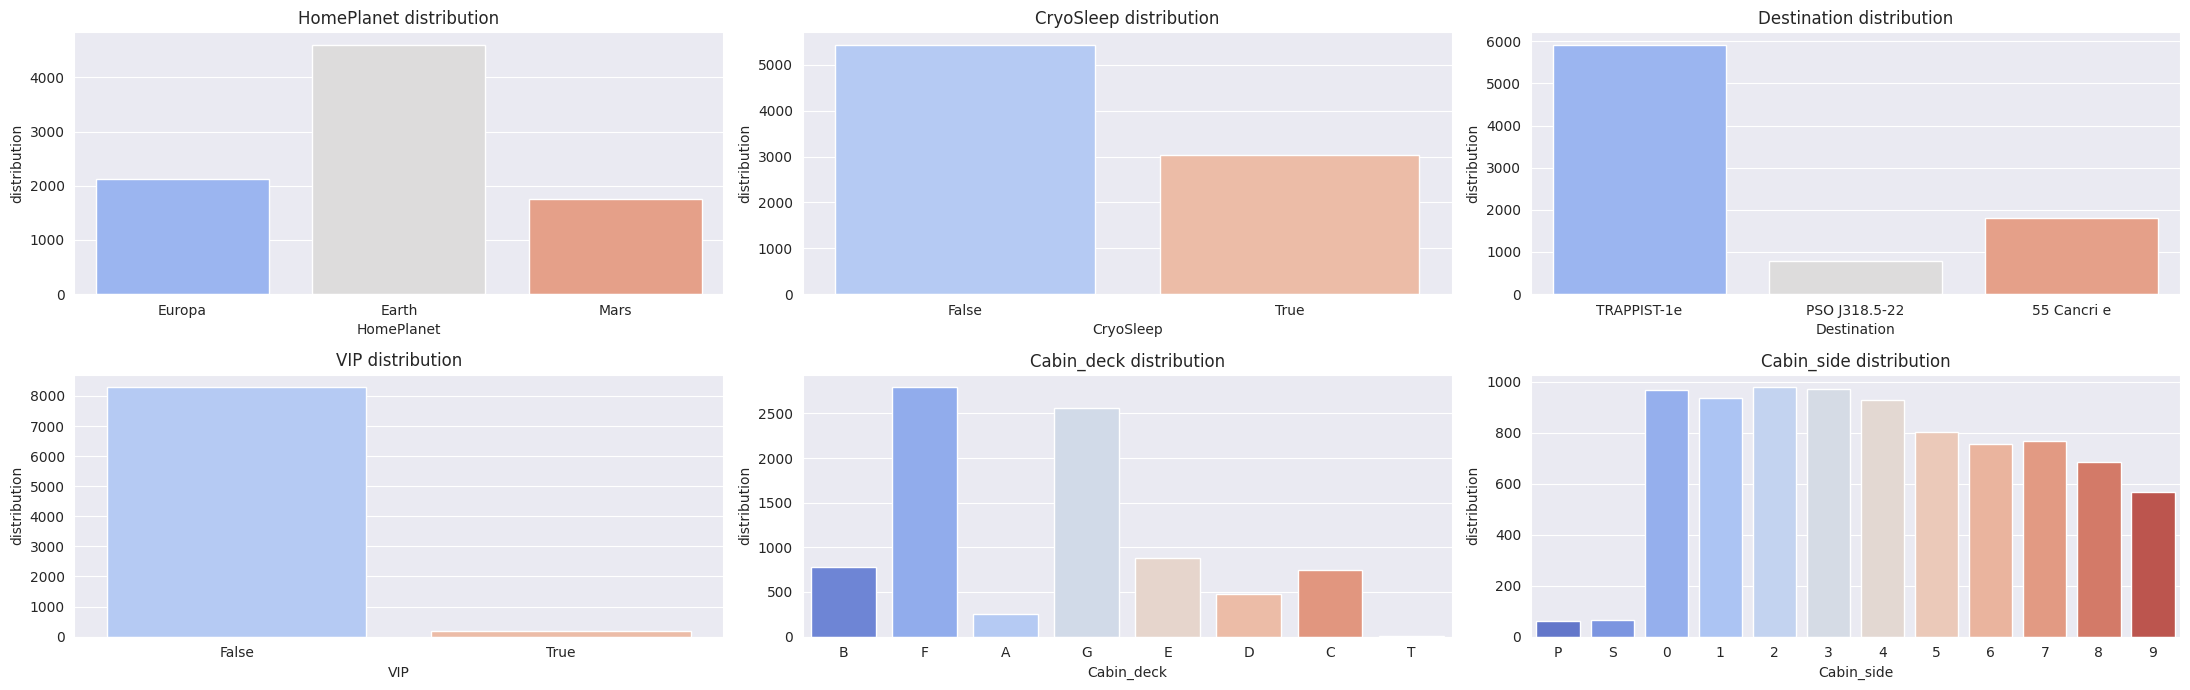

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,7))
for index, feature in enumerate(cat_feat):
  plt.subplot(2,3,index+1)
  sns.countplot(x=feature,data=X,palette='coolwarm')
  plt.xlabel(feature)
  plt.ylabel('distribution')
  plt.title(f"{feature} distribution")

plt.tight_layout()

Checking if the dataset is imbalanced or not

In [28]:
train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64